# Clustering Algorithms
## Topics
-  Spectral Clustering
-  Expectation-Maximization (EM) Algorithm
-  Hierarchical Agglomerative Clustering
-  Outlier Detection using Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Load the KosteckiDillion dataset (replace with actual dataset path)
file_path = "KosteckiDillon.csv"
data = pd.read_csv(file_path)

# Clean the data by dropping rows with missing values
data_clean = data.dropna()

# Select numerical columns for clustering
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])

## Spectral Clustering

c:\Users\aathe\anaconda3\envs\dl_default\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aathe\anaconda3\envs\dl_default\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


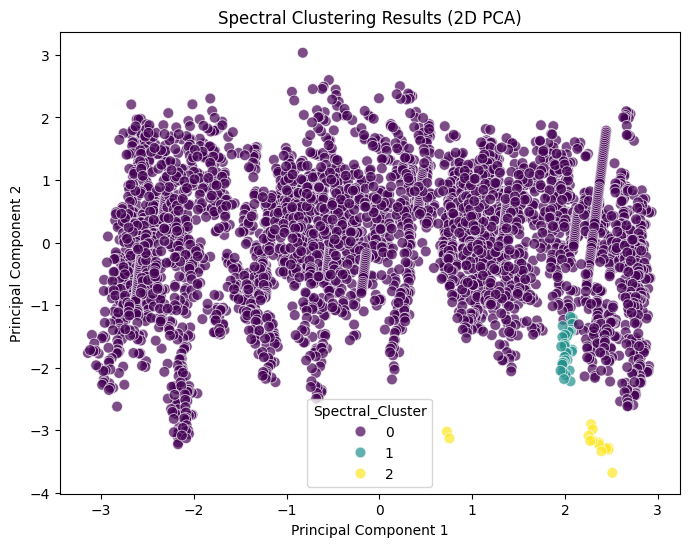

In [3]:
spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
data_clean['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_clean['Spectral_Cluster'], palette="viridis", s=60, alpha=0.7)
plt.title("Spectral Clustering Results (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [4]:
# Silhouette score for spectral clustering
silhouette_avg = silhouette_score(scaled_data, data_clean['Spectral_Cluster'])
print(f"Spectral Clustering Silhouette Score: {silhouette_avg}")

Spectral Clustering Silhouette Score: 0.28310433905259913


## Expectation-Maximization (EM) Algorithm

In [5]:
gmm = GaussianMixture(n_components=3, random_state=42)
data_clean['EM_Cluster'] = gmm.fit_predict(scaled_data)

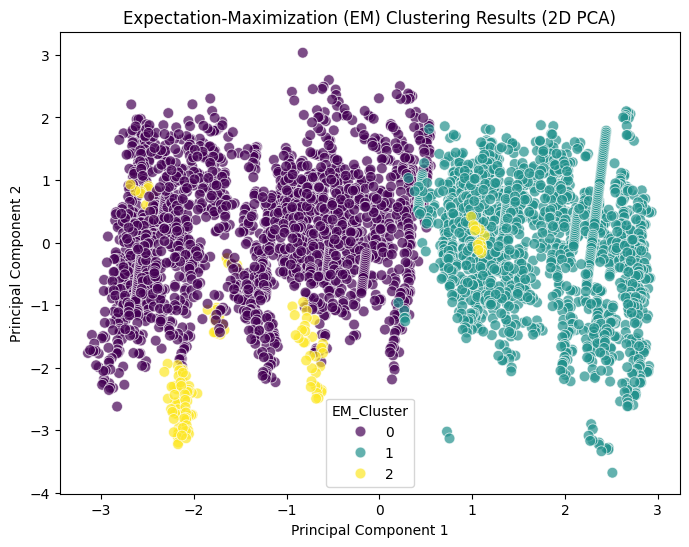

In [6]:
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_clean['EM_Cluster'], palette="viridis", s=60, alpha=0.7)
plt.title("Expectation-Maximization (EM) Clustering Results (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### BIC and AIC for model evaluation

In [ ]:
print(f"BIC (Bayesian Information Criterion): {gmm.bic(scaled_data)}")
print(f"AIC (Akaike Information Criterion): {gmm.aic(scaled_data)}")

BIC (Bayesian Information Criterion): 22719.95308008015
AIC (Akaike Information Criterion): 22194.451409817957


## Hierarchical Agglomerative Clustering

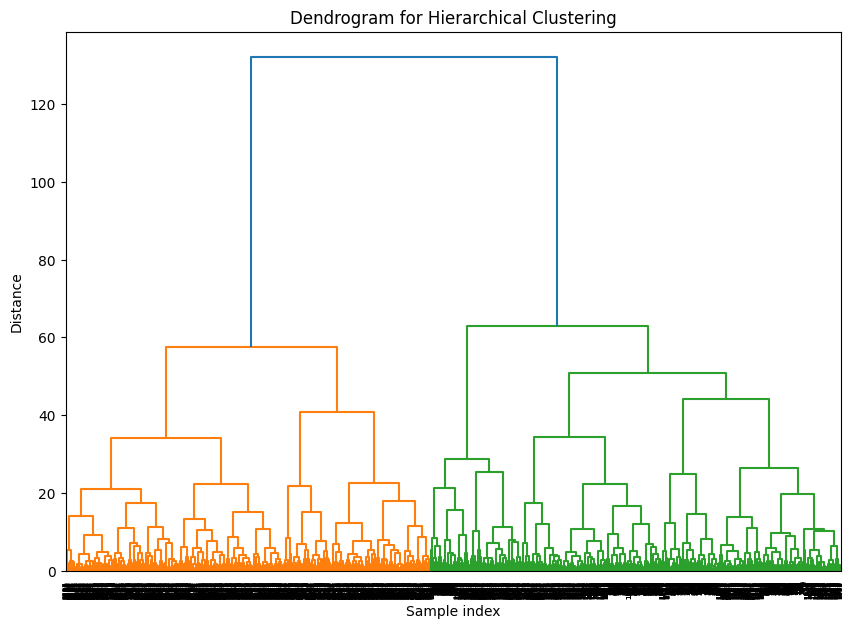

In [8]:
# Linkage matrix for hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Dendrogram visualization
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [9]:
# Form clusters based on distance threshold
threshold = 3  
clusters = fcluster(linked, threshold, criterion='distance')

# Add hierarchical cluster labels to the dataframe
data_clean['Hierarchical_Cluster'] = clusters

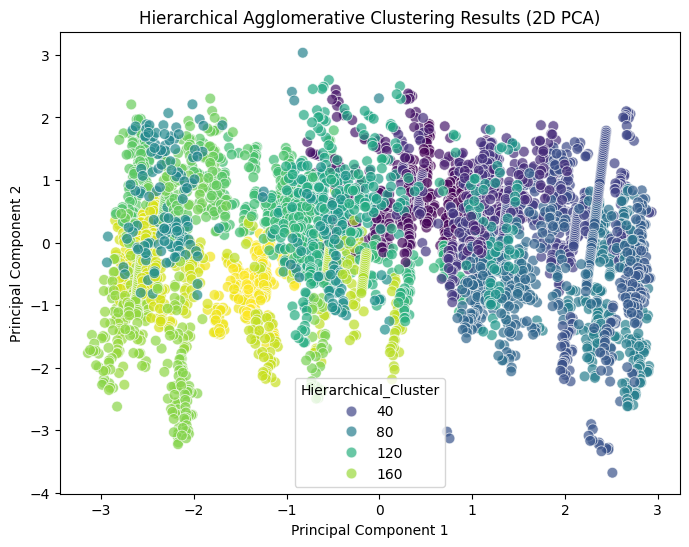

In [10]:
# Visualizing hierarchical clusters with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_clean['Hierarchical_Cluster'], palette="viridis", s=60, alpha=0.7)
plt.title("Hierarchical Agglomerative Clustering Results (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Outlier Detection using Clustering

In [11]:
outlier_indices = data_clean[data_clean['Hierarchical_Cluster'] == max(clusters)].index
outliers = data_clean.iloc[outlier_indices]
print("\nOutliers Detected:")
print(outliers)


Outliers Detected:
      rownames  id  time  dos   hatype  age  airq  medication headache  \
1046      1047  33    19  398  No Aura   36  22.0  continuing      yes   
1048      1049  33    21  400  No Aura   36  21.0  continuing      yes   
1049      1050  33    22  401  No Aura   36  22.0  continuing      yes   
1050      1051  33    23  402  No Aura   36  22.0  continuing      yes   
1051      1052  33    24  403  No Aura   36  21.0  continuing      yes   
1052      1053  33    25  404  No Aura   36  20.0  continuing      yes   
1053      1054  33    27  406  No Aura   36  19.0  continuing      yes   
1074      1075  34    21  400     Aura   39  19.0     reduced      yes   
1077      1078  34    24  403     Aura   39  18.0     reduced       no   
1083      1084  34    30  409     Aura   39  18.0     reduced      yes   
1084      1085  34    31  410     Aura   39  27.0     reduced       no   
1085      1086  34    32  411     Aura   39  22.0     reduced       no   
1086      1087  34

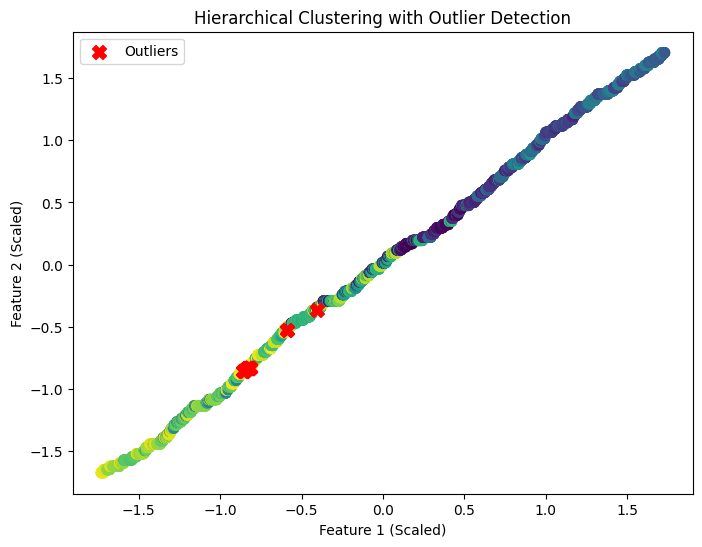

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(scaled_data[outlier_indices, 0], scaled_data[outlier_indices, 1], color='red', label="Outliers", s=100, marker='X')
plt.title("Hierarchical Clustering with Outlier Detection")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()